In [2]:
import os
import numpy as np
import mne

/home/jtorretr/anaconda3/lib/python3.7/site-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


In [5]:
data_folder = mne.datasets.sample.data_path()
raw_filename = os.path.join(data_folder, 'MEG/sample/sample_audvis_raw.fif')

raw_data = mne.io.read_raw_fif(raw_filename)
raw_data.crop(tmax=60).load_data()

Opening raw data file /home/jtorretr/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~107.0 MB, data loaded>

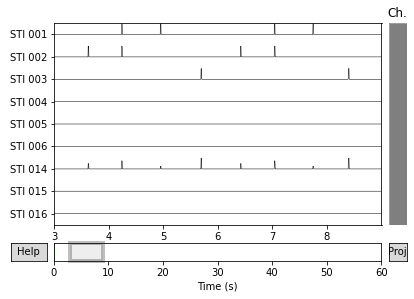

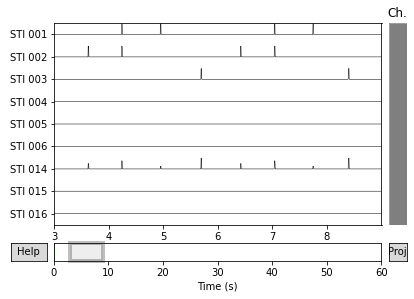

In [7]:
# Visualize STIM channels
raw_data.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6)

In [10]:
events = mne.find_events(raw_data, stim_channel='STI 014')
print(events[:5])

86 events found
Event IDs: [ 1  2  3  4  5 32]
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


In [5]:
test_data_path = mne.datasets.testing.data_path()
eeglab_raw_file = os.path.join(test_data_path, 'EEGLAB/test_raw.set')
eeglab_raw = mne.io.read_raw_eeglab(eeglab_raw_file)
print(eeglab_raw.annotations)

Reading /home/jtorretr/mne_data/MNE-testing-data/EEGLAB/test_raw.fdt
<Annotations | 154 segments: rt (74), square (80)>


In [6]:
print(len(eeglab_raw.annotations))
print(set(eeglab_raw.annotations.duration))
print(set(eeglab_raw.annotations.description))
print(eeglab_raw.annotations.onset[0])

154
{0.0}
{'rt', 'square'}
1.000068


In [7]:
events_from_annot, event_dict = mne.events_from_annotations(eeglab_raw)
print(event_dict)
print(events_from_annot[:5])

Used Annotations descriptions: ['rt', 'square']
{'rt': 1, 'square': 2}
[[128   0   2]
 [217   0   2]
 [267   0   1]
 [602   0   2]
 [659   0   1]]


In [8]:
custom_mapping = {'rt': 77, 'square': 42}
(events_from_annot,
 event_dict) = mne.events_from_annotations(eeglab_raw, event_id=custom_mapping)
print(event_dict)
print(events_from_annot[:5])

Used Annotations descriptions: ['rt', 'square']
{'rt': 77, 'square': 42}
[[128   0  42]
 [217   0  42]
 [267   0  77]
 [602   0  42]
 [659   0  77]]
